In [47]:
#manipulação dos dados
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#divisão da base de dados entre treino e teste
from sklearn.model_selection import train_test_split

#modelos de regressao linear
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#avaliação e perfomance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
#carregando a base de dados
dados = pd.read_csv('pinguins.csv', sep=';')

In [49]:
dados.shape

(344, 8)

In [50]:
dados.columns

Index(['especie', 'ilha', 'comprimento_bico', 'profundidade_bico',
       'comprimento_nadadeira', 'massa_corporal', 'sexo', 'ano'],
      dtype='object')

In [51]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                344 non-null    object 
 1   ilha                   344 non-null    object 
 2   comprimento_bico       342 non-null    object 
 3   profundidade_bico      342 non-null    object 
 4   comprimento_nadadeira  342 non-null    float64
 5   massa_corporal         342 non-null    float64
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 24.2+ KB


In [52]:
dados['comprimento_bico'] = pd.to_numeric(dados['comprimento_bico'].str.replace(',','.'))
dados['profundidade_bico'] = pd.to_numeric(dados['profundidade_bico'].str.replace(',','.'))

In [53]:
dados.dropna(axis=0, inplace=True)

In [54]:
dados.describe()

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,ano
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


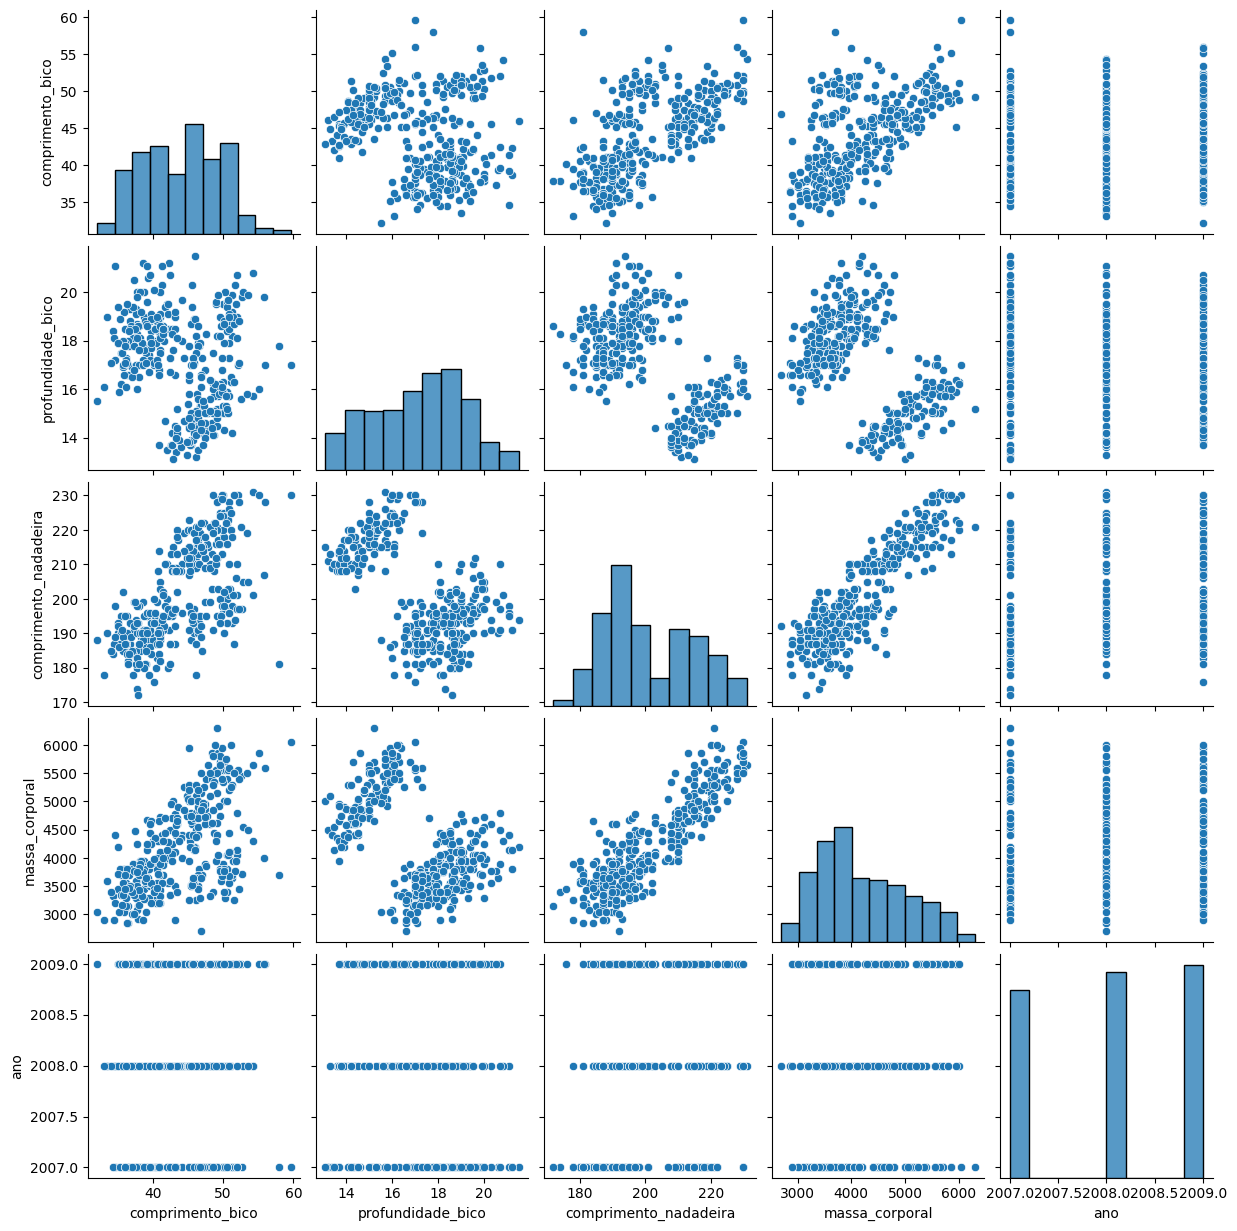

In [55]:
sns.pairplot(dados)

In [56]:
dados.drop('ano', axis=1, inplace=True)

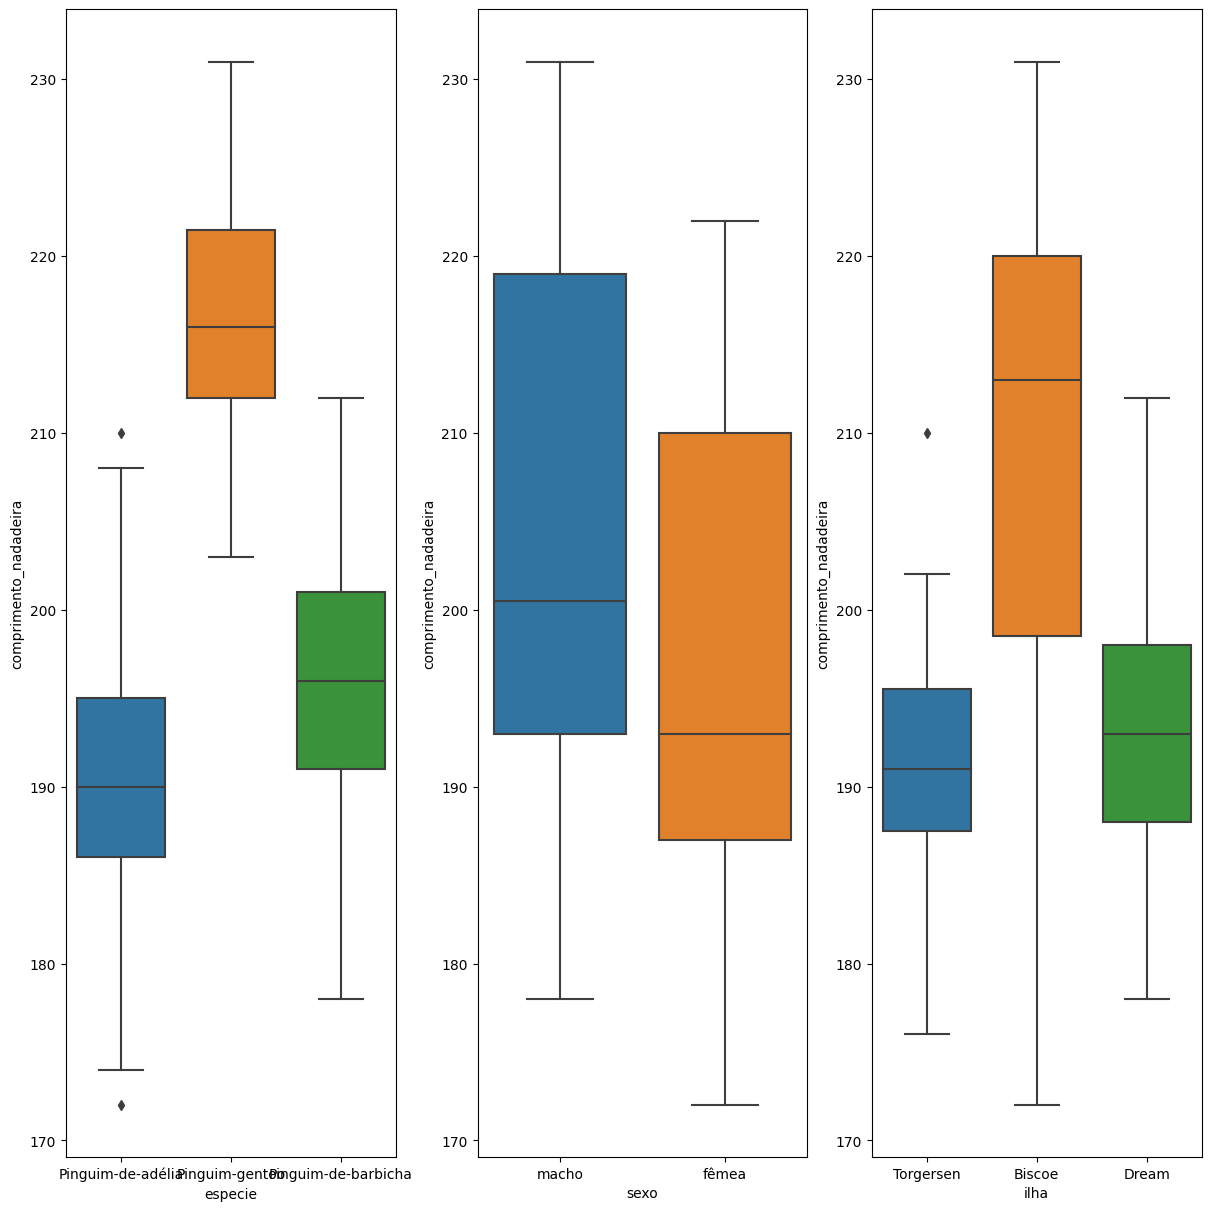

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), constrained_layout=True)
sns.boxplot(x='especie', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[0])
sns.boxplot(x='sexo', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[1])
sns.boxplot(x='ilha', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[2])
plt.show()

<Axes: xlabel='ilha', ylabel='count'>

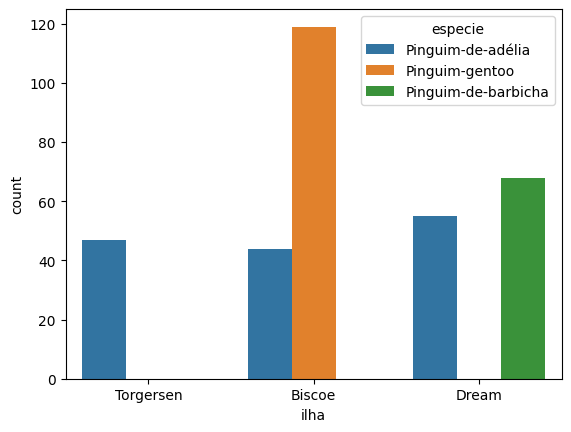

In [58]:
sns.countplot(x='ilha', hue='especie', data=dados)

In [59]:
dados.drop(['sexo', 'ilha'], axis=1, inplace=True)

In [60]:
dados.head()

,especie,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal
1,Pinguim-de-adélia,39.1,18.7,181.0,3750.0
2,Pinguim-de-adélia,39.5,17.4,186.0,3800.0
3,Pinguim-de-adélia,40.3,18.0,195.0,3250.0
5,Pinguim-de-adélia,36.7,19.3,193.0,3450.0
6,Pinguim-de-adélia,39.3,20.6,190.0,3650.0


In [61]:
dados['massa_corporal'] = dados['massa_corporal'] / 1000

In [62]:
dados_encoded = pd.get_dummies(dados, columns=['especie'])

In [63]:
correlacao = dados_encoded.corr(method='pearson')
correlacao

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo
comprimento_bico,1.000000,-0.228626,0.653096,0.589451,-0.836409,0.449098,0.488256
profundidade_bico,-0.228626,1.000000,-0.577792,-0.472016,0.531342,0.323505,-0.822293
comprimento_nadadeira,0.653096,-0.577792,1.000000,0.872979,-0.685947,-0.186175,0.866854
massa_corporal,0.589451,-0.472016,0.872979,1.000000,-0.550479,-0.298622,0.821178
especie_Pinguim-de-adélia,-0.836409,0.531342,-0.685947,-0.550479,1.000000,-0.447597,-0.658904
especie_Pinguim-de-barbicha,0.449098,0.323505,-0.186175,-0.298622,-0.447597,1.000000,-0.377744
especie_Pinguim-gentoo,0.488256,-0.822293,0.866854,0.821178,-0.658904,-0.377744,1.000000


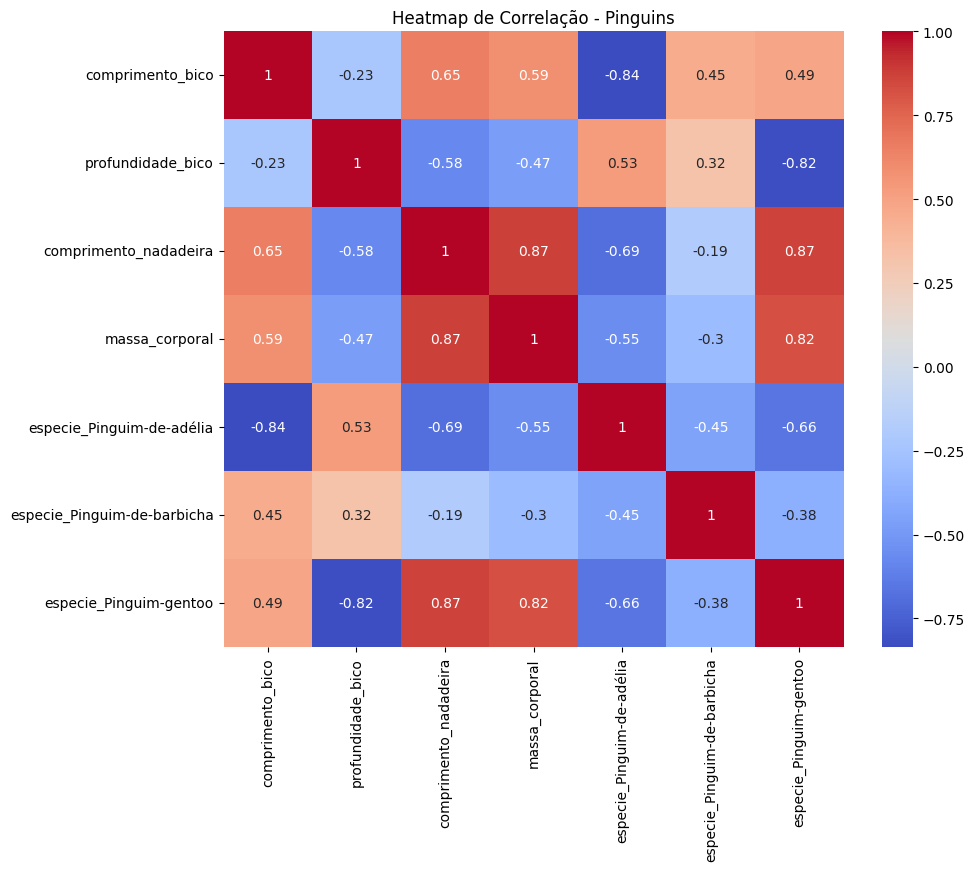

In [64]:
# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Pinguins')
plt.show()

# MODELO COM TODAS AS VARIAVEIS

In [65]:
y1 = dados_encoded['comprimento_nadadeira']

x1 = dados_encoded.drop(['comprimento_nadadeira'], axis=1)

In [66]:
x1 = sm.add_constant(x1)

In [67]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [68]:
# Fit the model
model_1 = LinearRegression()
model_1.fit(x_train1, y_train1)

LinearRegression()

In [69]:
# Print the coefficients
print("Intercept:", model_1.intercept_)
print("Coefficient:", model_1.coef_)

Intercept: 142.82514085615801
Coefficient: [ 0.          0.50903353  0.84127379  4.97257356 -6.18040593 -6.2551445
 12.43555042]


In [70]:
# Make predictions on the test data
y_pred = model_1.predict(x_test1)

# Create a DataFrame with real and predicted values
results = pd.DataFrame({'Real': y_test1, 'Predicted': y_pred})
print(results.head(100))  # Display the first 10 rows

      Real   Predicted
31   178.0  186.961696
321  196.0  195.812812
80   195.0  194.033670
203  210.0  215.044723
64   192.0  193.016119
..     ...         ...
21   174.0  188.188263
8    195.0  196.334597
217  219.0  213.891610
100  192.0  194.586100
36   196.0  194.985906

[100 rows x 2 columns]


In [71]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test1, y_pred)
mse = mean_squared_error(y_test1, y_pred)
rmse = mean_squared_error(y_test1, y_pred, squared=False)
r2 = sklearn.metrics.r2_score(y_test1, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.7030561052558664
Mean Squared Error: 24.53963188672919
Root Mean Squared Error: 4.9537492757233075
R-squared: 0.8544951136738153


# MODELO APENAS COM MASSA E GENTOO

In [72]:
x1.columns

Index(['const', 'comprimento_bico', 'profundidade_bico', 'massa_corporal',
       'especie_Pinguim-de-adélia', 'especie_Pinguim-de-barbicha',
       'especie_Pinguim-gentoo'],
      dtype='object')

In [73]:
y2 = dados_encoded['comprimento_nadadeira']

x2 = dados_encoded.drop(['comprimento_nadadeira','comprimento_bico', 'profundidade_bico',
       'especie_Pinguim-de-adélia', 'especie_Pinguim-de-barbicha'], axis=1)

In [74]:
x2 = sm.add_constant(x2)

In [75]:
x2

,const,massa_corporal,especie_Pinguim-gentoo
1,1.0,3.750,0
2,1.0,3.800,0
3,1.0,3.250,0
5,1.0,3.450,0
6,1.0,3.650,0
...,...,...,...
340,1.0,4.000,0
341,1.0,3.400,0
342,1.0,3.775,0
343,1.0,4.100,0


In [76]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [77]:
# Fit the model
model_2 = LinearRegression()
model_2.fit(x_train2, y_train2)

LinearRegression()

In [78]:
print("Intercept:", model_2.intercept_)
print("Coefficient:", model_2.coef_)

Intercept: 160.72860316728924
Coefficient: [ 0.          8.40804267 13.85881472]


In [79]:
# Make predictions on the test data
y_pred2 = model_2.predict(x_test2)

# Create a DataFrame with real and predicted values
results = pd.DataFrame({'Real': y_test2, 'Predicted': y_pred2})
print(results.head(100))  # Display the first 10 rows

      Real   Predicted
31   178.0  188.054742
321  196.0  191.628160
80   195.0  194.360774
203  210.0  215.366425
64   192.0  194.781176
..     ...         ...
21   174.0  189.315948
8    195.0  200.036203
217  219.0  214.105218
100  192.0  195.201578
36   196.0  195.621980

[100 rows x 2 columns]


In [82]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
r2 = sklearn.metrics.r2_score(y_test2, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4.224772942718277
Mean Squared Error: 31.71605133354938
Root Mean Squared Error: 5.631700572078507
R-squared: 0.8119433712247652


# MODELO COM MASSA GENTO COMP_BICO

In [83]:
y3 = dados_encoded['comprimento_nadadeira']

x3 = dados_encoded.drop(['comprimento_nadadeira', 'profundidade_bico',
       'especie_Pinguim-de-adélia', 'especie_Pinguim-de-barbicha'], axis=1)

In [84]:
x3 = sm.add_constant(x3)

In [85]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=42)

In [89]:
x_test3

,const,comprimento_bico,massa_corporal,especie_Pinguim-gentoo
31,1.0,39.5,3.250,0
321,1.0,50.9,3.675,0
80,1.0,42.1,4.000,0
203,1.0,46.6,4.850,1
64,1.0,41.1,4.050,0
...,...,...,...,...
21,1.0,37.8,3.400,0
8,1.0,39.2,4.675,0
217,1.0,45.8,4.700,1
100,1.0,43.2,4.100,0


In [90]:
# Fit the model
model_3 = LinearRegression()
model_3.fit(x_train3, y_train3)

LinearRegression()

In [91]:
print("Intercept:", model_2.intercept_)
print("Coefficient:", model_2.coef_)

Intercept: 160.72860316728924
Coefficient: [ 0.          8.40804267 13.85881472]


In [92]:
# Make predictions on the test data
y_pred3 = model_3.predict(x_test3)

# Create a DataFrame with real and predicted values
results = pd.DataFrame({'Real': y_test3, 'Predicted': y_pred3})
print(results.head(100))  # Display the first 10 rows

      Real   Predicted
31   178.0  187.730025
321  196.0  196.431853
80   195.0  193.687736
203  210.0  215.402253
64   192.0  193.455407
..     ...         ...
21   174.0  187.730507
8    195.0  196.238344
217  219.0  214.060487
100  192.0  194.886271
36   196.0  193.044402

[100 rows x 2 columns]


In [94]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test3, y_pred3)
mse = mean_squared_error(y_test3, y_pred3)
rmse = mean_squared_error(y_test3, y_pred3, squared=False)
r2 = sklearn.metrics.r2_score(y_test3, y_pred3)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.810689010073393
Mean Squared Error: 25.191439796865435
Root Mean Squared Error: 5.019107470145009
R-squared: 0.8506302946615067
